In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot
from matplotlib.pyplot import *
import math

In [2]:
MH200=pd.read_csv('MH200.csv')
MH200.drop(MH200.filter(regex="Unname"),axis=1, inplace=True)
MH200

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,20,2.0,0.000,499420.40,4.377,0.0,0.000,77.60,4.377,1.00,0.000,1.00,0.000,0.03,0.002,0.05,0.003,0.741
1,200,1,50,36.0,9.236,467786.60,402.142,0.0,0.000,31677.40,399.884,0.94,0.001,1.00,0.000,0.00,0.000,0.00,0.001,0.376
2,200,1,100,66253.5,1716.090,146863.25,1855.119,80.0,10.501,286303.25,1862.122,0.43,0.004,1.00,0.000,0.19,0.005,0.32,0.006,0.100
3,200,3,10,2.0,0.000,499497.50,0.500,0.0,0.000,0.50,0.500,1.00,0.000,1.00,0.000,0.83,0.167,0.90,0.100,0.891
4,200,3,20,2.0,0.000,499425.80,3.720,0.0,0.000,72.20,3.720,1.00,0.000,1.00,0.000,0.03,0.001,0.05,0.003,0.741
5,200,3,50,2539.4,171.713,466499.80,1209.553,228.6,30.276,30232.20,1080.198,0.94,0.002,0.92,0.011,0.08,0.003,0.14,0.005,0.376
6,200,3,100,339339.0,2268.604,103680.60,2307.697,38956.2,1341.834,17524.20,1093.083,0.89,0.001,0.90,0.003,0.95,0.003,0.92,0.001,0.100
7,200,5,10,2.0,0.000,499496.50,0.645,0.0,0.000,1.50,0.645,1.00,0.000,1.00,0.000,0.64,0.131,0.76,0.093,0.891
8,200,5,20,10.6,1.288,499424.20,2.800,1.6,0.245,63.60,2.064,1.00,0.000,0.87,0.015,0.14,0.014,0.24,0.020,0.741
9,200,5,50,18366.2,662.229,446175.40,2694.977,23838.4,1931.082,11120.00,208.277,0.93,0.004,0.44,0.013,0.62,0.005,0.51,0.009,0.376


In [3]:
MH200.columns

Index(['MH', 'LSH', 'band', 'TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE',
       'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE', 'Accuracy_mean', 'Acc_1SE',
       'Precision_mean', 'Prec_1SE', 'Recall_mean', 'Recall_1SE', 'F1_mean',
       'F1_1SE', 'SIM_t'],
      dtype='object')

In [4]:
MH200.band.unique()

array([ 20,  50, 100,  10], dtype=int64)

## MH200 B100

In [5]:
MH200B100=MH200[MH200['band'].eq(100)]
MH200B100.drop(MH200B100.filter(regex="Unname"),axis=1, inplace=True)
MH200B100

C:\Users\Ellie\Anaconda3\envs\songs\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
2,200,1,100,66253.5,1716.090,146863.25,1855.119,80.0,10.501,286303.25,1862.122,0.43,0.004,1.0,0.000,0.19,0.005,0.32,0.006,0.1
6,200,3,100,339339.0,2268.604,103680.60,2307.697,38956.2,1341.834,17524.20,1093.083,0.89,0.001,0.9,0.003,0.95,0.003,0.92,0.001,0.1
10,200,5,100,334818.8,3515.800,109162.20,2946.325,35509.0,1829.659,20010.00,1529.938,0.89,0.002,0.9,0.004,0.94,0.004,0.92,0.002,0.1


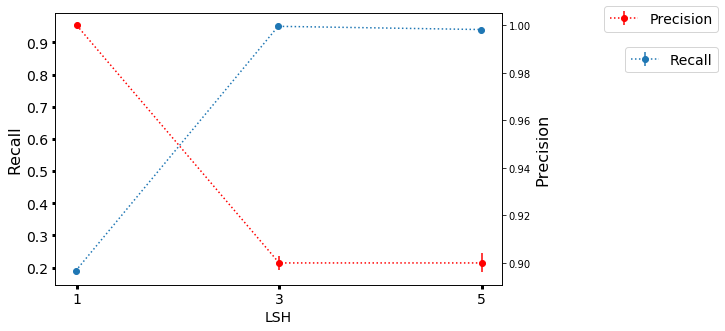

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH200B100
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

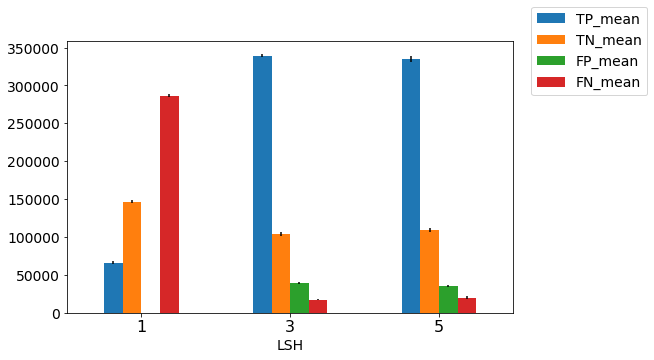

In [7]:
#MH200 bands 100
MH200B100
x=['1','3','5']
df1=MH200B100[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

## MH200 B50

In [8]:
MH200B50=MH200[MH200['band'].eq(50)]
MH200B50.drop(MH200B50.filter(regex="Unname"),axis=1, inplace=True)
MH200B50

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
1,200,1,50,36.0,9.236,467786.6,402.142,0.0,0.000,31677.4,399.884,0.94,0.001,1.00,0.000,0.00,0.000,0.00,0.001,0.376
5,200,3,50,2539.4,171.713,466499.8,1209.553,228.6,30.276,30232.2,1080.198,0.94,0.002,0.92,0.011,0.08,0.003,0.14,0.005,0.376
9,200,5,50,18366.2,662.229,446175.4,2694.977,23838.4,1931.082,11120.0,208.277,0.93,0.004,0.44,0.013,0.62,0.005,0.51,0.009,0.376


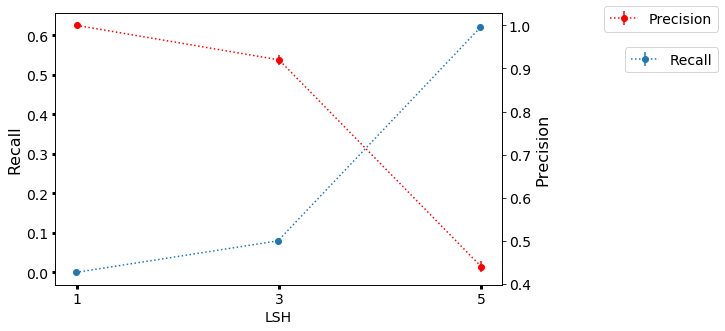

In [9]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH200B50
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



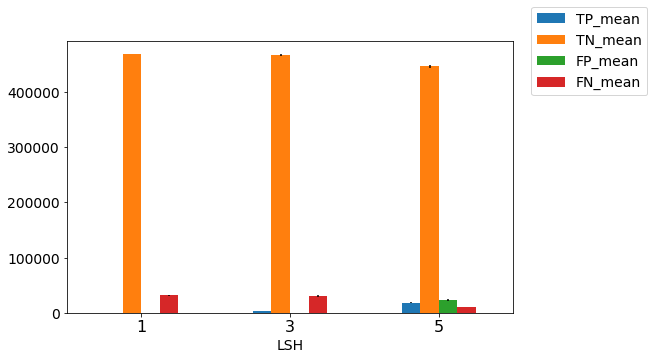

In [10]:
#MH200 bands 50
x=['1','3','5']
df1=MH200B50[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

In [11]:
MH200.band.unique()

array([ 20,  50, 100,  10], dtype=int64)

## MH200 B20

In [12]:
MH200B20=MH200[MH200['band'].eq(20)]
MH200B20.drop(MH200B20.filter(regex="Unname"),axis=1, inplace=True)
MH200B20

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,20,2.0,0.000,499420.4,4.377,0.0,0.000,77.6,4.377,1.0,0.0,1.00,0.000,0.03,0.002,0.05,0.003,0.741
4,200,3,20,2.0,0.000,499425.8,3.720,0.0,0.000,72.2,3.720,1.0,0.0,1.00,0.000,0.03,0.001,0.05,0.003,0.741
8,200,5,20,10.6,1.288,499424.2,2.800,1.6,0.245,63.6,2.064,1.0,0.0,0.87,0.015,0.14,0.014,0.24,0.020,0.741


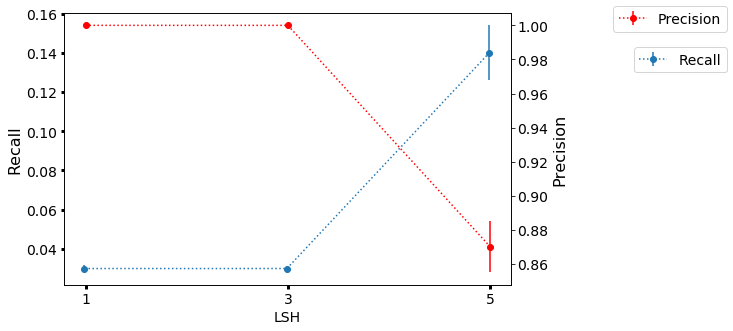

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH200B20
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

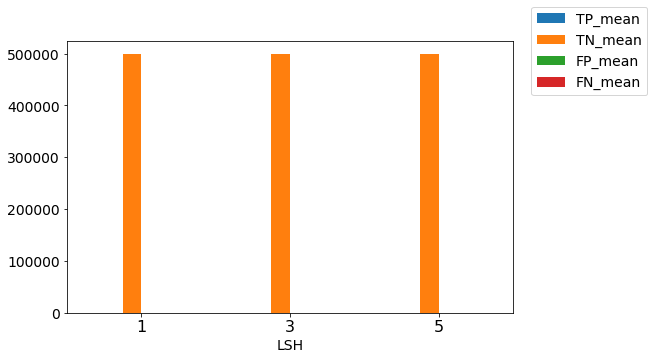

In [14]:
#MH200 band20
MH200B20
x=['1','3','5']
df1=MH200B20[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

## MH600 B100

In [15]:
MH600=pd.read_csv('MH600LSH1LSH3LSH5.csv')
MH600.drop(MH600.filter(regex="Unname"),axis=1, inplace=True)
MH600

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.60,2758.482,80139.40,327.885,18.40,8.687,291872.60,2866.687,0.42,0.006,1.00,0.000,0.300000,0.007000,0.470000,0.008000,0.058
1,600,1,200,2451.00,160.851,265795.00,1666.826,0.20,0.200,231253.80,1587.064,0.54,0.003,1.00,0.000,0.010479,0.000654,0.020738,0.001280,0.171
2,600,1,150,77.80,6.719,414433.60,1347.672,0.00,0.000,84988.60,1350.253,0.83,0.003,1.00,0.000,0.000917,0.000085,0.001833,0.000170,0.286
3,600,1,100,2.20,0.200,490812.20,277.088,0.00,0.000,8685.60,277.080,0.98,0.001,1.00,0.000,0.000254,0.000023,0.000508,0.000047,0.464
4,600,1,50,2.00,0.000,499407.60,1.720,0.00,0.000,90.40,1.720,1.00,0.000,1.00,0.000,0.021675,0.000405,0.042429,0.000775,0.722
5,600,1,30,2.00,0.000,499493.50,0.645,0.00,0.000,4.50,0.645,1.00,0.000,1.00,0.000,0.320000,0.032000,0.480000,0.037000,0.844
6,600,3,300,410194.00,1614.392,59155.80,1877.955,20037.60,1740.122,10112.60,1451.379,0.94,0.001,0.95,0.004,0.980000,0.003000,0.960000,0.001000,0.058
7,600,3,200,213350.80,992.707,206171.80,3163.943,62670.40,3906.789,17307.00,886.796,0.84,0.006,0.77,0.011,0.930000,0.004000,0.840000,0.005000,0.171
8,600,3,150,6250.20,360.166,414661.40,634.486,131.40,22.787,78457.00,539.885,0.84,0.001,0.98,0.002,0.070000,0.004000,0.140000,0.007000,0.286
9,600,3,100,352.75,33.510,491383.50,308.381,23.25,7.341,7740.50,273.324,0.98,0.001,0.94,0.016,0.040000,0.003000,0.080000,0.005000,0.464


## MH600 B100

In [16]:
MH600B100=MH600[MH600['band'].eq(100)]
MH600B100

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
3,600,1,100,2.20,0.200,490812.2,277.088,0.00,0.000,8685.6,277.080,0.98,0.001,1.00,0.000,0.000254,0.000023,0.000508,0.000047,0.464
9,600,3,100,352.75,33.510,491383.5,308.381,23.25,7.341,7740.5,273.324,0.98,0.001,0.94,0.016,0.040000,0.003000,0.080000,0.005000,0.464
15,600,5,100,563.60,31.101,490894.8,345.241,46.60,4.792,7995.0,319.984,0.98,0.001,0.92,0.005,0.070000,0.002000,0.120000,0.004000,0.464


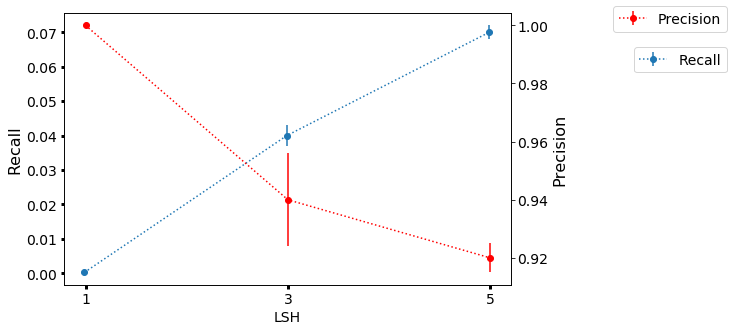

In [17]:
MH600B100=MH600[MH600['band'].eq(100)]
MH600B100.drop(MH600B100.filter(regex="Unname"),axis=1, inplace=True)
MH600B100

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH600B100
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



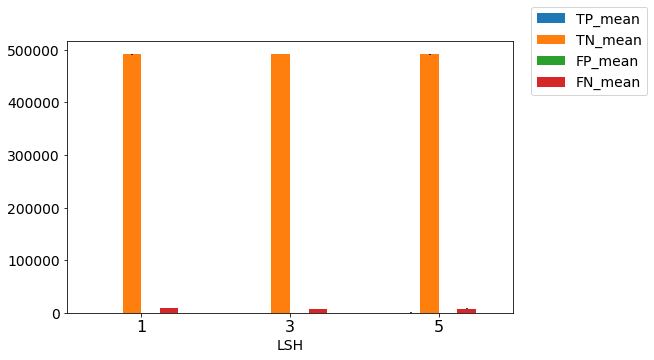

In [18]:
#MH600 band100
MH600B100=MH600[MH600['band'].eq(100)]
MH600B100.drop(MH600B100.filter(regex="Unname"),axis=1, inplace=True)
MH600B100
x=['1','3','5']
df1=MH600B100[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

## MH600 B150

In [19]:
MH600.band.unique()

array([300, 200, 150, 100,  50,  30], dtype=int64)

In [20]:
MH600B150=MH600[MH600['band'].eq(150)]
MH600B150.drop(MH600B150.filter(regex="Unname"),axis=1, inplace=True)
MH600B150

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
2,600,1,150,77.8,6.719,414433.60,1347.672,0.00,0.000,84988.6,1350.253,0.83,0.003,1.00,0.000,0.000917,0.000085,0.001833,0.00017,0.286
8,600,3,150,6250.2,360.166,414661.40,634.486,131.40,22.787,78457.0,539.885,0.84,0.001,0.98,0.002,0.070000,0.004000,0.140000,0.00700,0.286
14,600,5,150,58426.5,1299.055,384587.25,1911.390,28608.75,1506.528,27877.5,885.774,0.89,0.001,0.67,0.007,0.680000,0.012000,0.670000,0.00300,0.286


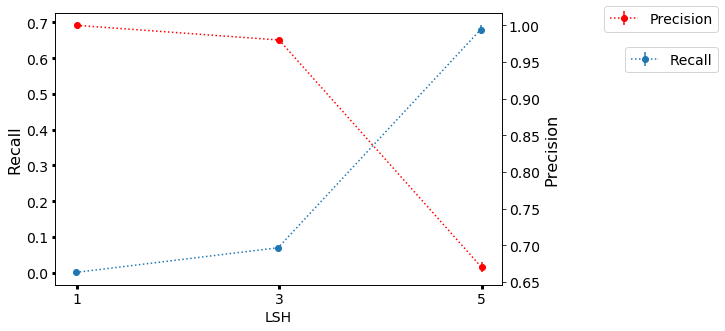

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH600B150
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



## MH600 B200

In [23]:
MH600B200=MH600[MH600['band'].eq(200)]
MH600B200.drop(MH600B200.filter(regex="Unname"),axis=1, inplace=True)
MH600B200

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
1,600,1,200,2451.0,160.851,265795.00,1666.826,0.2,0.200,231253.80,1587.064,0.54,0.003,1.00,0.000,0.010479,0.000654,0.020738,0.00128,0.171
7,600,3,200,213350.8,992.707,206171.80,3163.943,62670.4,3906.789,17307.00,886.796,0.84,0.006,0.77,0.011,0.930000,0.004000,0.840000,0.00500,0.171
13,600,5,200,210291.0,1122.959,216704.57,594.848,51404.0,1152.937,21100.43,733.962,0.85,0.001,0.80,0.004,0.910000,0.003000,0.850000,0.00200,0.171


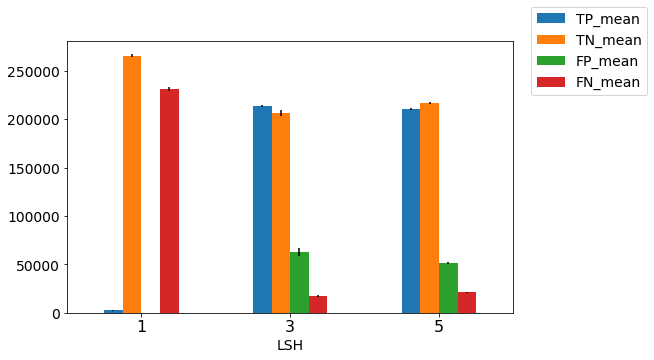

In [25]:
#MH600 band 200
MH600B200
x=['1','3','5']
df1=MH600B200[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

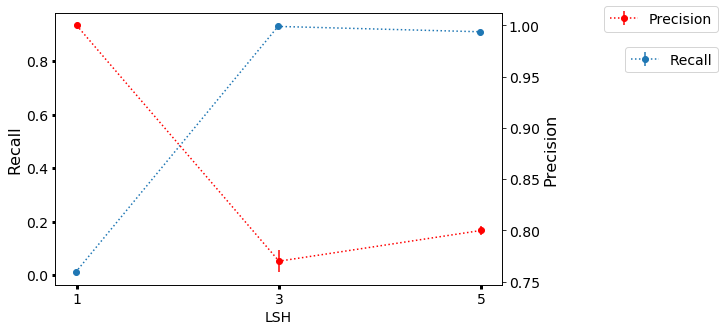

In [26]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH600B200
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



## MH600 B300

In [29]:
MH600B300=MH600[MH600['band'].eq(300)]
MH600B300.drop(MH600B300.filter(regex="Unname"),axis=1, inplace=True)
MH600B300

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.6,2758.482,80139.4,327.885,18.4,8.687,291872.6,2866.687,0.42,0.006,1.00,0.000,0.30,0.007,0.47,0.008,0.058
6,600,3,300,410194.0,1614.392,59155.8,1877.955,20037.6,1740.122,10112.6,1451.379,0.94,0.001,0.95,0.004,0.98,0.003,0.96,0.001,0.058
12,600,5,300,409038.0,1143.087,61052.0,828.409,18521.0,781.600,10889.0,824.930,0.94,0.001,0.96,0.002,0.97,0.002,0.97,0.001,0.058


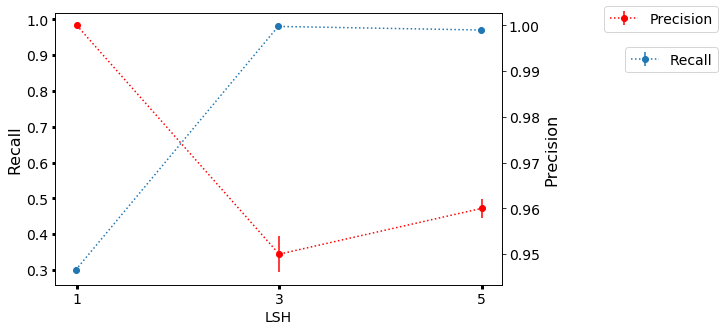

In [30]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH600B300
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



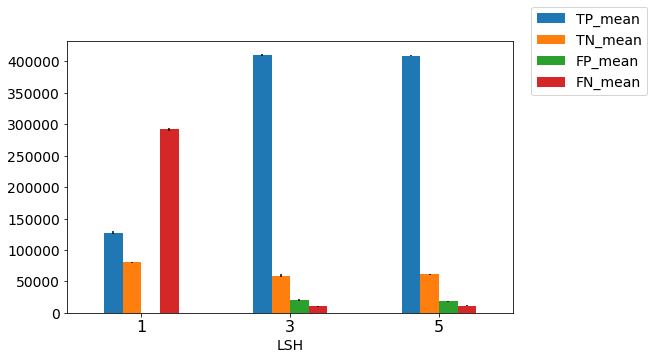

In [33]:
#MH600 band300
MH600B300
x=['1','3','5']
df1=MH600B300[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()